In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn import feature_selection
from sklearn.svm import SVC
from sklearn.svm import SVR


# Validation
from sklearn.metrics import mean_squared_error

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 28

import warnings
warnings.filterwarnings('ignore')

In [25]:
# Percentage of NaNs for each column that has NaNs

import pandas as pd
import numpy as np

from sklearn.base import TransformerMixin

class Imputer(TransformerMixin):

    def __init__(self):
        """Filters and Imputes missing values based on dtype.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    
    def fit(self, X, y=None):
        self.fill = {}
        for col in X:
            if X[col].dtype == np.float64:
                self.fill[col] = X[col].mean()
            elif X[col].dtype == np.int64:
                self.fill[col] = X[col].median()
            else:
                self.fill[col] = X[col].mode()[0]
        
        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

def nan_percentage(df, threshold, show=False):
    # we look for columns with any NaNs first so that we can show only those
    df_nan = df[df.columns[df.isnull().any()].to_list()]
    df_nan_percentage = df_nan.isnull().sum() / len(df.index)*100
    if show: 
        print('Percentage of NaNs of columns with missing values:')
        print(df_nan_percentage)
    columns_to_drop = df_nan_percentage.index[df_nan_percentage > threshold].tolist()
    return df.drop(columns_to_drop, axis=1)



def extend_nan_cols(df):
    # make new columns indicating what will be imputed
    nan_cols = (col for col in df.columns if df[col].isnull().any())
    for col in nan_cols:
        df.loc[:, col + '_was_missing'] = df.loc[:, col].isnull()
    return df

def split_training_data(df, target):
    X = df.drop(target, axis=1)
    y = df.loc[:, target]
    train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
    pd.concat
    return dict(train_X = train_X, val_X = val_X, train_y = train_y, val_y = val_y)

# Decision tree model
def decision_tree(train_X, train_y, impute=False):
    if impute:
        imputer = SimpleImputer()
        train_X = imputer.fit_transform(train_X)
        
    model = DecisionTreeRegressor(random_state=1)
    model.fit(train_X, train_y)
    return model

def impute(df):
    df_copy = df.copy()
    for col in df_copy:
        if df_copy[col].dtype == object:
            df_copy[col] = df_copy[col].fillna(df_copy[col].mode()[0])
        else:
            df_copy[col] = df_copy[col].fillna(df_copy[col].mean())
    return df_copy

def rf_feature_importance(df, target, threshold):
    plt.subplots
    rfr = RandomForestRegressor(random_state=1, max_depth=10)
    rfr.fit(df.drop(target, axis=1), df[target])
    importances = pd.Series(rfr.feature_importances_*100, df.drop('SalePrice', axis=1).columns)
    importances = importances[importances > threshold].sort_values()
    importances.plot('barh')
    return importances.index.to_list()

# Random forest model
def random_forest(train_X, train_y, impute=False):
    if impute:
        imputer = SimpleImputer()
        train_X = imputer.fit_transform(train_X)
        
    model = RandomForestRegressor(random_state=1)
    model.fit(train_X, train_y)
    return model

In [229]:
train_data_path = 'train.csv'
test_data_path = 'test.csv'

data = pd.read_csv(train_data_path)
test_X = pd.read_csv(test_data_path)

train_data = nan_percentage(data, 80, show=False)


y = train_data['SalePrice']
X = train_data.drop(['Id', 'SalePrice'], axis=1)

for col in X:
    if X[col].dtype == object:
        if X[col].value_counts()[0]/len(X.index) > 0.9:
            print(col+':', X[col].value_counts()[0]/len(X.index))

Street: 0.9958904109589041
Utilities: 0.9993150684931507
LandSlope: 0.9465753424657535
Condition2: 0.9897260273972602
RoofMatl: 0.9821917808219178
Heating: 0.9780821917808219
CentralAir: 0.934931506849315
Electrical: 0.9136986301369863
Functional: 0.9315068493150684
GarageCond: 0.9082191780821918
PavedDrive: 0.9178082191780822


In [297]:
def preprocessing(X):
    imputed_X = Imputer().fit_transform(X)
    ohe_to_drop = []
    for col in imputed_X:
        if imputed_X[col].dtype == object:
            counts = imputed_X[col].value_counts()[imputed_X[col].value_counts() <= 2].index.to_list()
            ohe_to_drop.extend([col + '_' + category for category in counts])
                        
    he_X = pd.get_dummies(imputed_X, drop_first=True)
#     he_X.drop(ohe_to_drop, axis=1, inplace=True)
    std_X = StandardScaler(with_mean=True, with_std=True).fit_transform(he_X)
    return std_X



In [254]:
#imputed_X = preprocessing(X)
imputed_X = Imputer().fit_transform(X)
ohe_to_drop = []
for col in imputed_X:
    if imputed_X[col].dtype == object:
        counts = imputed_X[col].value_counts()[imputed_X[col].value_counts() == 1].index.to_list()
        ohe_to_drop.extend([col + '_' + category for category in counts])
print(ohe_to_drop)

he_X = pd.get_dummies(imputed_X)
he_clean_X = he_X.drop(ohe_to_drop, axis=1)
he_clean_X.columns[59]


['Utilities_NoSeWa', 'Condition2_RRAn', 'Condition2_RRAe', 'Condition2_PosA', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_ClyTile', 'Exterior1st_CBlock', 'Exterior1st_AsphShn', 'Exterior1st_ImStucc', 'Exterior2nd_CBlock', 'Exterior2nd_Other', 'ExterCond_Po', 'Heating_Floor', 'HeatingQC_Po', 'Electrical_Mix', 'Functional_Sev']


'LandSlope_Sev'

In [255]:
#imputed_X['Exterior2nd'].value_counts().index.to_list()
# he_X.iloc[:, 155][he_X.iloc[:, 155] != 0]
# he_X.columns.to_list()[15]
n = 11
print(test_X[n][abs(test_X[n]) > 10])
print(np.where(abs(test_X[n]) > 10))
X['BsmtCond'].value_counts()[0]/len(X.index)
X['LandSlope'].value_counts()

[10.55024608 10.16295795 10.16295795]
(array([ 59, 145, 199], dtype=int64),)


Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [298]:
pp_X = preprocessing(X)
train_X, test_X, train_y, test_y = train_test_split(pp_X, y, random_state=1)

In [289]:

lr = LinearRegression(fit_intercept=False).fit(train_X, train_y)
predicted_y = lr.predict(test_X)
#np.where([test_X[15] > 10])
#test_X[15,155]
#lr.score(test_X, test_y)
#test_y
#predicted_y
print(len(predicted_y[predicted_y > 100000]))
pd.concat([pd.DataFrame(predicted_y).astype('int64'), test_y.reset_index(drop=True)], axis=1)
np.where(predicted_y > 10000000)
print("{:.3e}".format(mean_squared_error(predicted_y, test_y)))

327
2.074e+09


In [303]:
for C in range(0, 100, 1):
    svr = SVR(C=10).fit(train_X, train_y)
    predicted_y = svr.predict(test_X)
    print("{:.3e}".format(mean_squared_error(predicted_y, test_y)))

6.820e+09
6.820e+09
6.820e+09
6.820e+09
6.820e+09
6.820e+09
6.820e+09
6.820e+09
6.820e+09
6.820e+09
6.820e+09
6.820e+09
6.820e+09
6.820e+09
6.820e+09
6.820e+09
6.820e+09
6.820e+09
6.820e+09
6.820e+09
6.820e+09
6.820e+09
6.820e+09
6.820e+09
6.820e+09
6.820e+09
6.820e+09
6.820e+09
6.820e+09
6.820e+09
6.820e+09
6.820e+09
6.820e+09
6.820e+09
6.820e+09
6.820e+09
6.820e+09
6.820e+09


KeyboardInterrupt: 

In [7]:
features = rf_feature_importance(train_he, 'SalePrice', 0.5)    

C:\Users\ka_ra\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
cls

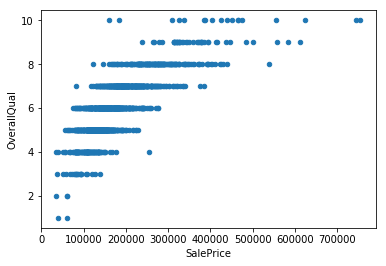

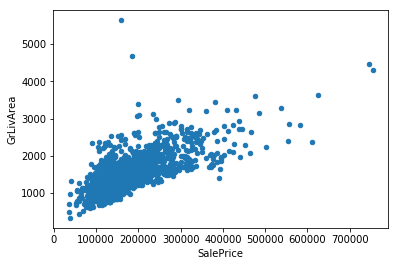

In [37]:
train_he.plot.scatter(x='SalePrice', y='OverallQual')
train_he.plot.scatter(x='SalePrice', y='GrLivArea')

In [24]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lg = LinearRegression()
rfe = RFE(lg, 15)
rfe.fit_transform(data_he[0].drop('SalePrice', axis=1), data_he[0]['SalePrice'])
importances = pd.Series(rfe.ranking_, data_he[0].drop('SalePrice', axis=1).columns)
importances = importances.sort_values()[:14]

importances.plot('barh')
importances

KeyError: 0

In [ ]:
# Only numerical features
data_only_num = [df.select_dtypes(exclude=object) for df in data_clean]

# Only non-NaN numerical features
data_nonNaN = [df.dropna(axis=1) for df in data_only_num]

# Only numerical features with extended missing values
data_only_num_ext = [extend_nan_cols(df) for df in data_only_num]

datasets = [data_nonNaN, data_only_num, data_only_num_ext]

# Split data into training data and validation data
for data in datasets:
    data[0] = split_training_data(data[0], 'SalePrice')

In [ ]:
# imputer = SimpleImputer()
# data[0]['train_X']
# pd.DataFrame(imputer.fit_transform(data[0]['train_X']))

In [ ]:
imputer = SimpleImputer()

for data in datasets:
    data[0]['val_X'] = imputer.fit_transform(data[0]['val_X'])    
    data[0]['DT prediction'] = decision_tree(data[0]['train_X'], data[0]['train_y'], impute=True).predict(data[0]['val_X'])
    data[0]['RF prediction'] = random_forest(data[0]['train_X'], data[0]['train_y'], impute=True).predict(data[0]['val_X'])

In [ ]:
fig, ax = plt.subplots()
#sns.set_style("white")
n_models = 2
DT_MAEs = [mean_absolute_error(data[0]['DT prediction'], data[0]['val_y']) for data in datasets]
RF_MAEs = [mean_absolute_error(data[0]['RF prediction'], data[0]['val_y']) for data in datasets]
width = 0.25
ax.barh(np.arange(len(datasets)), DT_MAEs, width, color='g')
ax.barh(np.arange(len(datasets))+width, RF_MAEs, width, color='b')

ax.set_yticks(np.arange(len(datasets))+0.125)
ax.set_yticklabels(('Features with no NaNs', 'Features with imputed values', 'Features with\nextended imputed values'));
ax.set_xlim(0,35000)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticklabels([])
ax.set_xticks([])
for i, v in enumerate(DT_MAEs):
    ax.text(v+1000, i, str(int(v)), va='center', color='green', fontweight='bold')
for i, v in enumerate(RF_MAEs):
    ax.text(v+1000, i+0.25, str(int(v)), va='center', color='blue', fontweight='bold')